# **Data 전처리**

In [7]:
# 파일 불러오기

from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [ ]:
# Goal: 다음 분기에 어떤 게임을 설계해야 할까?

# First priorities

# 1. 지역에 따라서 선호하는 게임 장르가 다를까? 
# 2. 연도별 게임의 트렌드가 있을까? 
# 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함!

In [9]:
# 데이터 불러오기

import pandas as pd

df = pd.read_csv('vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [10]:
# 'Unnamed: 0' 컬럼 제거

df = df.drop('Unnamed: 0', axis = 1)
df.head(100)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
95,Robotron 64,N64,1998.0,Shooter,GT Interactive,0.07,0.02,0,0
96,Gummy Bears Magical Medallion,Wii,2011.0,Platform,Storm City Games,0.02,0,0,0
97,Tony Hawk's Pro Skater 2,N64,2001.0,Sports,Activision,0.59,0.16,0,0.01
98,Red Steel 2,Wii,2010.0,Shooter,Ubisoft,0.36,0.21,0.01,0.06


In [14]:
df.shape

(16598, 9)

In [11]:
df.info()
# 각 Sales revenue 칼럼 float로 안되어있음. 나중에 바꿔주기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [15]:
# 컬럼별 결측치 
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [17]:
# Publisher 결측치 N/A(Not Available)로 대체 

import numpy as np

df['Publisher'] = df['Publisher'].replace(np.nan, 'N/A')
df.isnull().sum()


Name             0
Platform         0
Year           271
Genre           50
Publisher        0
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [18]:
# 'Year'컬럼 결측항 처리
df = df.dropna(how = 'any', axis = 0)
df.isnull().sum()
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [26]:
# 'Year'컬럼 오류 수정

def convert(x):
    if x < 20 : 
        return x + 2000
    elif x >= 20 and x < 100 : 
        return x+1900
    else :
        return x

df['Year'] = df['Year'].apply(convert)
df.head(50)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [28]:
# 각 지역 Sales revenue $K,M 삭제하고 곱하기 1000

def value_to_float(x):
    if 'K' in x:
        return float(x.replace('K', ''))
    elif 'M' in x:
        return float(x.replace('M', '')) * 1000
    else :
        return float(x) * 1000


In [29]:
# Float로 변환 

df['NA_Sales'] = df['NA_Sales'].apply(value_to_float)
df['EU_Sales'] = df['EU_Sales'].apply(value_to_float)
df['JP_Sales'] = df['JP_Sales'].apply(value_to_float)
df['Other_Sales'] = df['Other_Sales'].apply(value_to_float)

In [30]:
df.head(50)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170.0,0.0,0.0,10.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120.0,90.0,0.0,40.0
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.0,0.0,140.0,0.0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,20.0,10.0,0.0,0.0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,70.0,0.0,110.0,10.0
8,Imabikisou,PS3,2007.0,Adventure,Sega,0.0,0.0,40.0,0.0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,40.0,30.0,0.0,10.0


In [31]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [38]:
# 연평균 매출 컬럼 만들기 (Sales가 누적 수치임)

df['Accum_Years'] = 2020 - df['Year']

df['Avg_NA_Sales_Per_Year'] = df['NA_Sales'] / df['Accum_Years']
df['Avg_EU_Sales_Per_Year'] = df['EU_Sales'] / df['Accum_Years']
df['Avg_JP_Sales_Per_Year'] = df['JP_Sales'] / df['Accum_Years']
df['Avg_Other_Sales_Per_Year'] = df['Other_Sales'] / df['Accum_Years']
df.head(50)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Avg_NA_Sales_Per_Year,Avg_EU_Sales_Per_Year,Avg_JP_Sales_Per_Year,Avg_Other_Sales_Per_Year,Accum_Years
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40.0,0.0,0.0,0.0,3.333333,0.000000,0.000000,0.000000,12.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170.0,0.0,0.0,10.0,15.454545,0.000000,0.000000,0.909091,11.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20.0,0.0,0.000000,0.000000,2.000000,0.000000,10.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40.0,0.0,0.0,0.0,4.000000,0.000000,0.000000,0.000000,10.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120.0,90.0,0.0,40.0,12.000000,9.000000,0.000000,4.000000,10.0
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.0,0.0,140.0,0.0,0.000000,0.000000,9.333333,0.000000,15.0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,20.0,10.0,0.0,0.0,2.222222,1.111111,0.000000,0.000000,9.0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,70.0,0.0,110.0,10.0,4.666667,0.000000,7.333333,0.666667,15.0
8,Imabikisou,PS3,2007.0,Adventure,Sega,0.0,0.0,40.0,0.0,0.000000,0.000000,3.076923,0.000000,13.0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,40.0,30.0,0.0,10.0,4.444444,3.333333,0.000000,1.111111,9.0


In [40]:
# 누적 총매출, 누적 연평균 총매출 생성

df['Total_Sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df['Total_Sales_Per_Year'] = df['Avg_NA_Sales_Per_Year']+df['Avg_EU_Sales_Per_Year']+df['Avg_JP_Sales_Per_Year']+df['Avg_Other_Sales_Per_Year']
df.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Avg_NA_Sales_Per_Year,Avg_EU_Sales_Per_Year,Avg_JP_Sales_Per_Year,Avg_Other_Sales_Per_Year,Accum_Years,Total_Sales,Total_Sales_Per_Year
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40.0,0.0,0.0,0.0,3.333333,0.000000,0.000000,0.000000,12.0,40.0,3.333333
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170.0,0.0,0.0,10.0,15.454545,0.000000,0.000000,0.909091,11.0,180.0,16.363636
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20.0,0.0,0.000000,0.000000,2.000000,0.000000,10.0,20.0,2.000000
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40.0,0.0,0.0,0.0,4.000000,0.000000,0.000000,0.000000,10.0,40.0,4.000000
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120.0,90.0,0.0,40.0,12.000000,9.000000,0.000000,4.000000,10.0,250.0,25.000000
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.0,0.0,140.0,0.0,0.000000,0.000000,9.333333,0.000000,15.0,140.0,9.333333
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,20.0,10.0,0.0,0.0,2.222222,1.111111,0.000000,0.000000,9.0,30.0,3.333333
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,70.0,0.0,110.0,10.0,4.666667,0.000000,7.333333,0.666667,15.0,190.0,12.666667
8,Imabikisou,PS3,2007.0,Adventure,Sega,0.0,0.0,40.0,0.0,0.000000,0.000000,3.076923,0.000000,13.0,40.0,3.076923
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,40.0,30.0,0.0,10.0,4.444444,3.333333,0.000000,1.111111,9.0,80.0,8.888889


In [41]:
df.isnull().sum()

Name                        0
Platform                    0
Year                        0
Genre                       0
Publisher                   0
NA_Sales                    0
EU_Sales                    0
JP_Sales                    0
Other_Sales                 0
Avg_NA_Sales_Per_Year       0
Avg_EU_Sales_Per_Year       1
Avg_JP_Sales_Per_Year       1
Avg_Other_Sales_Per_Year    0
Accum_Years                 0
Total_Sales                 0
Total_Sales_Per_Year        1
dtype: int64

In [42]:
df = df.dropna()

In [43]:
df.isnull().sum()

Name                        0
Platform                    0
Year                        0
Genre                       0
Publisher                   0
NA_Sales                    0
EU_Sales                    0
JP_Sales                    0
Other_Sales                 0
Avg_NA_Sales_Per_Year       0
Avg_EU_Sales_Per_Year       0
Avg_JP_Sales_Per_Year       0
Avg_Other_Sales_Per_Year    0
Accum_Years                 0
Total_Sales                 0
Total_Sales_Per_Year        0
dtype: int64

# **1. 지역에 따라서 선호하는 게임 장르가 다를까?**

In [44]:
# 지역별 각 장르의 누적 매출

df_regions = df.loc[:,['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df_regions.head(10)

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,40.0,0.0,0.0,0.0
1,Action,170.0,0.0,0.0,10.0
2,Adventure,0.0,0.0,20.0,0.0
3,Misc,40.0,0.0,0.0,0.0
4,Platform,120.0,90.0,0.0,40.0
5,Sports,0.0,0.0,140.0,0.0
6,Simulation,20.0,10.0,0.0,0.0
7,Action,70.0,0.0,110.0,10.0
8,Adventure,0.0,0.0,40.0,0.0
9,Action,40.0,30.0,0.0,10.0


In [47]:
# Grouping

grouped = df_regions.groupby('Genre')
df_grouped = grouped.sum().reset_index()
df_grouped

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,858780.0,513640.0,156610.0,183990.0
1,Adventure,101920.0,63710.0,51890.0,16700.0
2,Fighting,220350.0,99900.0,87140.0,36150.0
3,Misc,400290.0,210200.0,104180.0,72740.0
4,Platform,445380.0,200650.0,130530.0,51450.0
5,Puzzle,121580.0,50480.0,56240.0,12440.0
6,Racing,354700.0,235030.0,56320.0,76510.0
7,Role-Playing,318760.0,183100.0,342930.0,56730.0
8,Shooter,574480.0,310230.0,38180.0,101860.0
9,Simulation,181160.0,113170.0,63540.0,31300.0


In [48]:
# Tidy data 만들기

tidy = df_grouped.melt(id_vars = 'Genre', value_vars = ['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales'])
tidy

,Genre,variable,value
0,Action,NA_Sales,858780.0
1,Adventure,NA_Sales,101920.0
2,Fighting,NA_Sales,220350.0
3,Misc,NA_Sales,400290.0
4,Platform,NA_Sales,445380.0
5,Puzzle,NA_Sales,121580.0
6,Racing,NA_Sales,354700.0
7,Role-Playing,NA_Sales,318760.0
8,Shooter,NA_Sales,574480.0
9,Simulation,NA_Sales,181160.0


In [49]:
variable_by_Genre_1 = tidy[tidy['Genre'] == 'Action'].groupby('variable').value.sum()
variable_by_Genre_2 = tidy[tidy['Genre'] == 'Adventure'].groupby('variable').value.sum()
variable_by_Genre_3 = tidy[tidy['Genre'] == 'Fighting'].groupby('variable').value.sum()
variable_by_Genre_4 = tidy[tidy['Genre'] == 'Misc'].groupby('variable').value.sum()
variable_by_Genre_5 = tidy[tidy['Genre'] == 'Platform'].groupby('variable').value.sum()
variable_by_Genre_6 = tidy[tidy['Genre'] == 'Puzzle'].groupby('variable').value.sum()
variable_by_Genre_7 = tidy[tidy['Genre'] == 'Racing'].groupby('variable').value.sum()
variable_by_Genre_8 = tidy[tidy['Genre'] == 'Role-Playing'].groupby('variable').value.sum()
variable_by_Genre_9 = tidy[tidy['Genre'] == 'Shooter'].groupby('variable').value.sum()
variable_by_Genre_10 = tidy[tidy['Genre'] == 'Simulation'].groupby('variable').value.sum()
variable_by_Genre_11 = tidy[tidy['Genre'] == 'Sports'].groupby('variable').value.sum()
variable_by_Genre_12 = tidy[tidy['Genre'] == 'Strategy'].groupby('variable').value.sum()

variable_by_Genre_1

variable
EU_Sales       513640.0
JP_Sales       156610.0
NA_Sales       858780.0
Other_Sales    183990.0
Name: value, dtype: float64

In [50]:
%matplotlib inline
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (14,8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

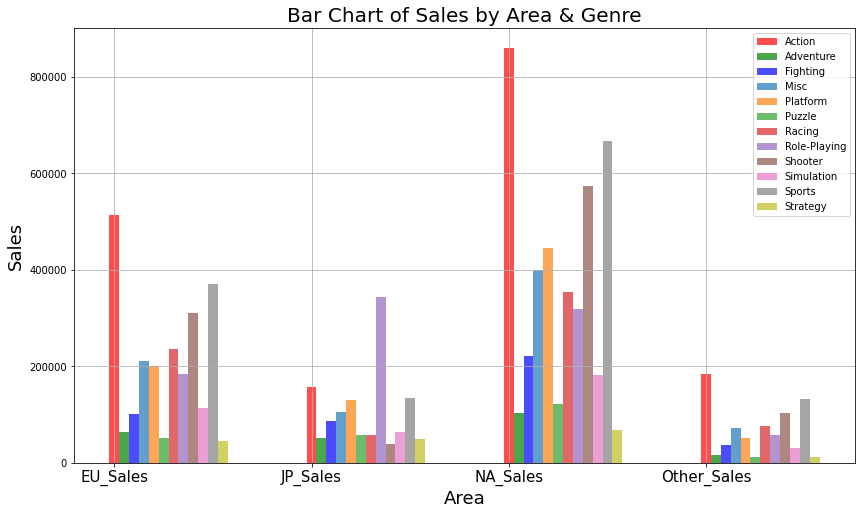

In [52]:
label = ['EU_Sales', 'JP_Sales', 'NA_Sales' , 'Other_Sales']
N = len(tidy['variable'].unique())
index = np.arange(N)

bar_width = 0.05
alpha = 0.7

p1 = plt.bar(index, variable_by_Genre_1, bar_width, color='r', alpha=alpha, label='Action')
p2 = plt.bar(index + bar_width * 1, variable_by_Genre_2, bar_width, color='g', alpha=alpha,label='Adventure')
p3 = plt.bar(index + bar_width * 2, variable_by_Genre_3, bar_width, color='b', alpha=alpha,label='Fighting')
p4 = plt.bar(index + bar_width * 3, variable_by_Genre_4, bar_width, color='#1f77b4', alpha=alpha,label='Misc')
p5 = plt.bar(index + bar_width * 4, variable_by_Genre_5, bar_width, color='#ff7f0e', alpha=alpha,label='Platform')
p6 = plt.bar(index + bar_width * 5, variable_by_Genre_6, bar_width, color='#2ca02c', alpha=alpha,label='Puzzle')
p7 = plt.bar(index + bar_width * 6, variable_by_Genre_7, bar_width, color='#d62728', alpha=alpha,label='Racing')
p8 = plt.bar(index + bar_width * 7, variable_by_Genre_8, bar_width, color='#9467bd', alpha=alpha,label='Role-Playing')
p9 = plt.bar(index + bar_width * 8, variable_by_Genre_9, bar_width, color='#8c564b', alpha=alpha,label='Shooter')
p10 = plt.bar(index + bar_width * 9, variable_by_Genre_10, bar_width, color='#e377c2', alpha=alpha,label='Simulation')
p11 = plt.bar(index + bar_width * 10, variable_by_Genre_11, bar_width, color='#7f7f7f', alpha=alpha,label='Sports')
p12 = plt.bar(index + bar_width * 11, variable_by_Genre_12, bar_width, color='#bcbd22', alpha=alpha,label='Strategy')

plt.title('Bar Chart of Sales by Area & Genre', fontsize=20)
plt.ylabel('Sales', fontsize=18)
plt.xlabel('Area', fontsize=18)
plt.xticks(index, label, fontsize=15)
plt.legend((p1[0],p2[0],p3[0],p4[0],p5[0],p6[0],p7[0],p8[0],p9[0],p10[0],p11[0],p12[0]), ('Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports','Strategy'), fontsize=10, facecolor='white')
plt.show()


NA 지역 : 1.액션 , 2.스포츠 , 3.슈터 순

EU 지역 : 1.액션 , 2.스포츠 , 3.슈터 순

JP 지역 : 1.롤플레잉, 2.액션 , 3.스포츠 순

기타지역 : 1.액션 , 2.스포츠 , 3.슈터 순

# **결론:**
**시장이 가장 큰 북미와 유럽을 타겟으로 액션 장르**



---



# **2. 연도별 게임의 트렌드가 있을까?**

In [55]:
# 연도, 장르 추출

df_trend = df.loc[:,['Year', 'Genre']]
df_trend.head(10)

,Year,Genre
0,2008.0,Action
1,2009.0,Action
2,2010.0,Adventure
3,2010.0,Misc
4,2010.0,Platform
5,2005.0,Sports
6,2011.0,Simulation
7,2005.0,Action
8,2007.0,Adventure
9,2011.0,Action


In [56]:
grouped_trend = df_trend.groupby(["Year", "Genre"]).size().reset_index()
grouped_trend
type(grouped_trend)

pandas.core.frame.DataFrame

In [57]:
grouped_trend.columns = ["Year", "Genre", "Value"]
grouped_trend

,Year,Genre,Value
0,1980.0,Action,1
1,1980.0,Fighting,1
2,1980.0,Misc,4
3,1980.0,Shooter,2
4,1981.0,Action,25
...,...,...,...
382,2016.0,Simulation,9
383,2016.0,Sports,38
384,2016.0,Strategy,10
385,2017.0,Action,1


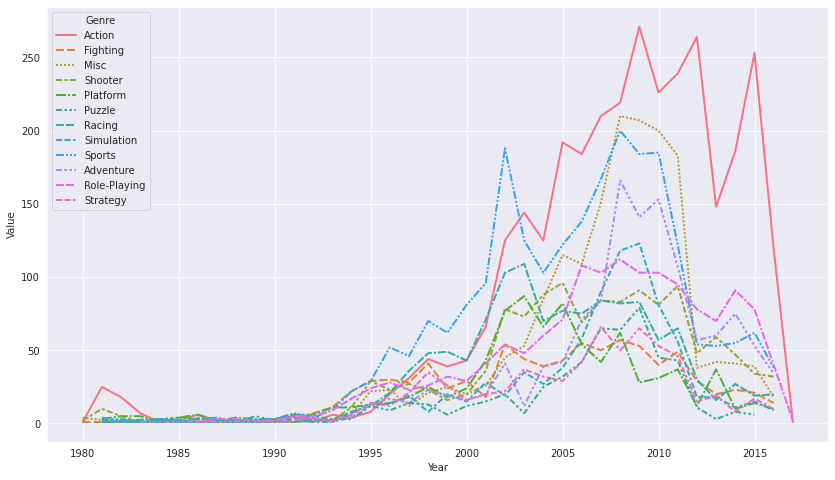

In [59]:
# 시각화

import seaborn as sb

sb.set_style('darkgrid', {'legend.frameon':True})
sb.lineplot(data=grouped_trend, x="Year", y="Value", hue="Genre", style="Genre")

# **결론**

2000-2005: 1.스포츠, 2.액션, 3.시뮬레이션

2005-2010: 1.액션, 2.스포츠, 3.기타(Misc: Miscellaneous)

2010-2015: 1.액션, 2.롤플레잉, 3.어드밴쳐





---



# **3.매출이 높은 게임에 대한 분석 및 시각화 프로세스**

In [60]:
#연매출 내림차순으로 보기

df_2 = df.sort_values(by= 'Total_Sales_Per_Year', ascending=False)
df_2 = df_2.head(50)
df_2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Avg_NA_Sales_Per_Year,Avg_EU_Sales_Per_Year,Avg_JP_Sales_Per_Year,Avg_Other_Sales_Per_Year,Accum_Years,Total_Sales,Total_Sales_Per_Year
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41490.0,29020.0,3770.0,8460.0,2963.571429,2072.857143,269.285714,604.285714,14.0,82740.0,5910.000000
3483,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7010.0,9270.0,970.0,4140.0,1001.428571,1324.285714,138.571429,591.428571,7.0,21390.0,3055.714286
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750.0,11010.0,3280.0,2960.0,1431.818182,1000.909091,298.181818,269.090909,11.0,33000.0,3000.000000
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850.0,12880.0,3790.0,3310.0,1320.833333,1073.333333,315.833333,275.833333,12.0,35830.0,2985.833333
9070,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5770.0,5810.0,350.0,2310.0,1154.000000,1162.000000,70.000000,462.000000,5.0,14240.0,2848.000000
16531,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14590.0,7060.0,4700.0,2260.0,1326.363636,641.818182,427.272727,205.454545,11.0,28610.0,2600.909091
10913,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9630.0,5310.0,60.0,1380.0,1375.714286,758.571429,8.571429,197.142857,7.0,16380.0,2340.000000
4343,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14970.0,4940.0,240.0,1670.0,1497.000000,494.000000,24.000000,167.000000,10.0,21820.0,2182.000000
6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11380.0,9230.0,6500.0,2900.0,812.857143,659.285714,464.285714,207.142857,14.0,30010.0,2143.571429
3014,Wii Play,Wii,2006.0,Misc,Nintendo,14030.0,9200.0,2930.0,2850.0,1002.142857,657.142857,209.285714,203.571429,14.0,29010.0,2072.142857


In [ ]:
df_2 = df_2.loc[:,['Name', 'Total_Sales_Per_Year']]

In [62]:
df_2['Arranged_Name'] = ['Wii', 'Grand Theft Auto' ,'Wii', 'Mario' ,'Call of Duty', 'Mario' ,'Grand Theft Auto' ,'Kinect Adventures!',
                         'Mario', 'Wii', 'Wii', 'Grand Theft Auto', 'Pokemon'
                         ,'Call of Duty', 'Wii', 'Call of Duty' ,'FIFA', 'Nintendogs' ,'Call of Duty', 
                         'Mario', 'Star Wars Battlefront (2015)', 'Call of Duty' ,'Call of Duty', 'Call of Duty',
                         'Call of Duty' ,'Fallout 4' ,'Call of Duty', 'Mario', 'Brain Age', 'Minecraft', 'Pokemon', 
                          'Pokemon', 'Grand Theft Auto', 'Call of Duty', 'Call of Duty'
                          ,'Mario' ,'Call of Duty', 'Mario' ,'Halo 4' ,'Mario' ,'FIFA' ,'Mario' ,'Mario',
                          'Just Dance 3', 'Animal Crossing','FIFA', 'Pokemon', 'Mario', 'Pokemon', 'Gran Turismo 5']

In [64]:
# 파이차트로 시각화
import plotly.express as px

fig = px.pie(df_2, values='Total_Sales_Per_Year', names='Arranged_Name')
fig.show()

# **결론**

매출 상위 10개 게임중 8개가 새로운 게임이 아닌 기존 게임의 후속편

새로운 게임 개발보다는 기존 게임IP를 활용한 게임개발, 또는 조인트 런칭도 좋은 방향



---



# **4. 어느 플랫폼으로 가장 많은 게임이 출시 되었을까?**

In [66]:
# 플랫폼별 총매출, 연평균매출 뽑아보기

df_1 = df.loc[:,['Name','Year','Genre','Platform', 
                 'Total_Sales','Total_Sales_Per_Year']]

df_1.head(10)                 

,Name,Year,Genre,Platform,Total_Sales,Total_Sales_Per_Year
0,Candace Kane's Candy Factory,2008.0,Action,DS,40.0,3.333333
1,The Munchables,2009.0,Action,Wii,180.0,16.363636
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,2010.0,Adventure,PSP,20.0,2.000000
3,Deal or No Deal: Special Edition,2010.0,Misc,DS,40.0,4.000000
4,Ben 10 Ultimate Alien: Cosmic Destruction,2010.0,Platform,PS3,250.0,25.000000
5,Power Pro Kun Pocket 8,2005.0,Sports,DS,140.0,9.333333
6,JASF: Jane's Advanced Strike Fighters,2011.0,Simulation,PC,30.0,3.333333
7,Samurai Warriors: State of War,2005.0,Action,PSP,190.0,12.666667
8,Imabikisou,2007.0,Adventure,PS3,40.0,3.076923
9,The Penguins of Madagascar: Dr. Blowhole Retur...,2011.0,Action,PS3,80.0,8.888889


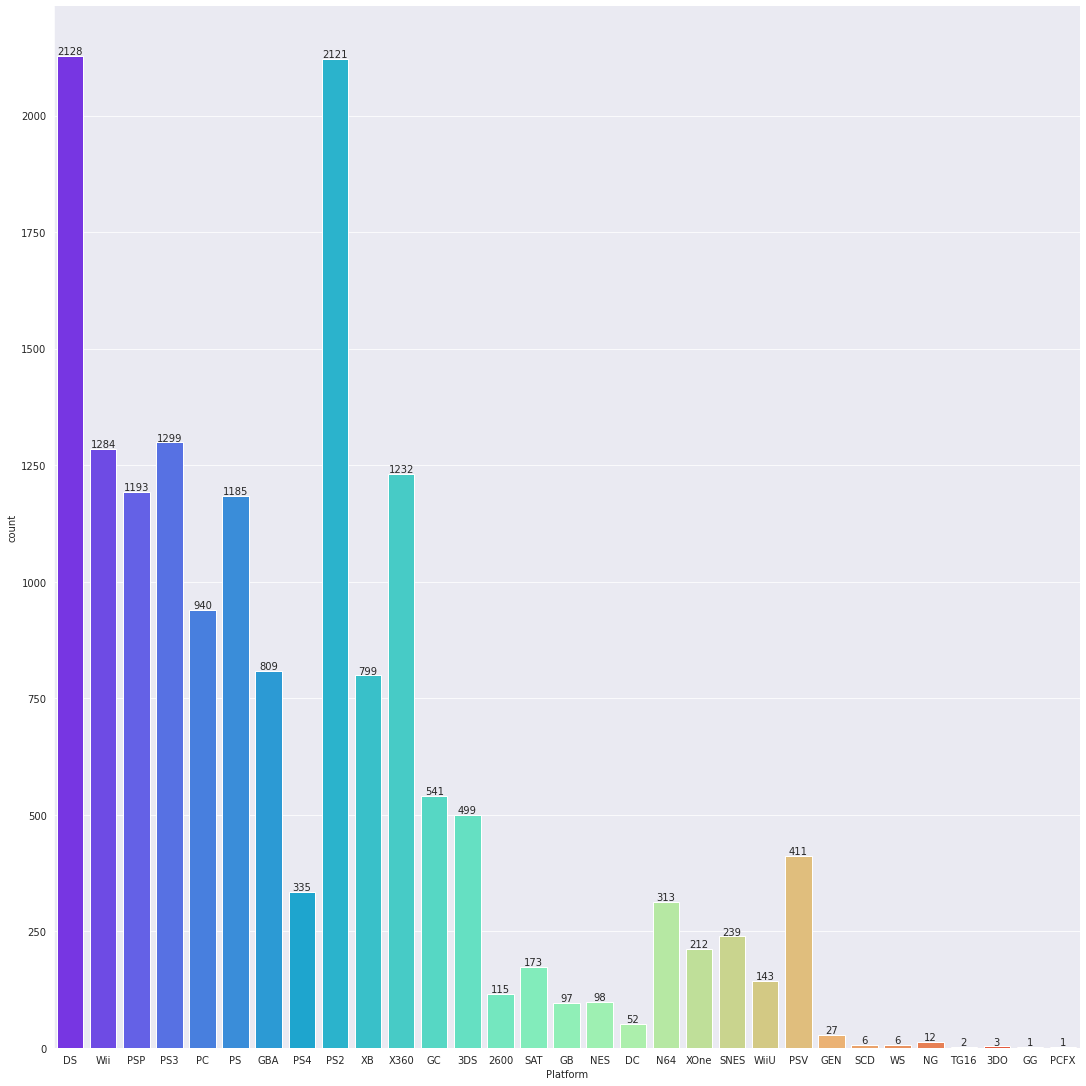

In [67]:
plot = sb.catplot(x="Platform", kind="count", palette="rainbow", data=df_1 , height = 15)

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, 
        h+10, 
        '{}'.format(int(h)),
        ha='center', 
        va='center',  
        size=10)

# **결론**


닌텐도계열 : 총 **5477개** (DS, Wii, GBA, 3DS, WiiU, GB, NES, N64)


PS계열 : 총 **6646개** (PSP, PS3, PS, PS4, PS2, PSV)


XBOX계열 : 총 **2302개** (XB, X360, XOne)
1) 


**PS계열의 출시 게임 수가 가장 많다**